# Data Collection

This notebook collects the data that was used to compare Idyoms information profiles and contrast information profiles. It consists of 152 folk melodies from Nova Scotia Canada.

In [1]:
using Chakra, Idyoms

In [2]:
using Melch

In [3]:
Melch.__INIT__("/Users/nick/Work/MelchData")

In [4]:
nova = fnd(Melch.id(0),Melch)
nova.description

"Songs and ballads from Nova Scotia, Canada."

In [5]:
melody_ids = pts(nova);

In [6]:
melodies = [fnd(m,Melch) for m in melody_ids];

# Tabulating the Data

In [7]:
nova_table = vcat([Melch.melody_to_df(m) for m in melodies]...);
nova_table[!,:dataset] = [x.dataset for x in nova_table.id];
nova_table[!,:melody] = [x.melody for x in nova_table.id];
nova_table[!,:event] = [x.event for x in nova_table.id];

In [41]:
nova_table[107:200,:]

Row,id,ONSET,DELTAST,BIOI,DUR,CPITCH,MPITCH,ACCIDENTAL,KEYSIG,MODE,BARLENGTH,PULSES,PHRASE,VOICE,ORNAMENT,COMMA,VERTINT12,ARTICULATION,DYN,dataset,melody,event
,EventId,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,None,Int64,None,Int64,Int64,Int64
1,"EventId(0, 2, 1)",72,0,1,24,71,41,0,1,0,96,4,1,1,0,0,None(),0,None(),0,2,1
2,"EventId(0, 2, 2)",96,0,24,24,74,43,0,1,0,96,4,0,1,0,0,None(),0,None(),0,2,2
3,"EventId(0, 2, 3)",120,0,24,24,71,41,0,1,0,96,4,0,1,0,0,None(),0,None(),0,2,3
4,"EventId(0, 2, 4)",144,0,24,24,72,42,0,1,0,96,4,0,1,0,0,None(),0,None(),0,2,4
5,"EventId(0, 2, 5)",168,0,24,24,69,40,0,1,0,96,4,0,1,0,0,None(),0,None(),0,2,5
6,"EventId(0, 2, 6)",192,0,24,24,71,41,0,1,0,96,4,0,1,0,0,None(),0,None(),0,2,6
7,"EventId(0, 2, 7)",216,0,24,12,69,40,0,1,0,96,4,0,1,0,0,None(),0,None(),0,2,7
8,"EventId(0, 2, 8)",228,0,12,12,66,38,1,1,0,96,4,0,1,0,0,None(),0,None(),0,2,8
9,"EventId(0, 2, 9)",240,0,12,36,62,36,0,1,0,96,4,-1,1,0,0,None(),0,None(),0,2,9


# Computing Information Profiles

In [14]:
sequences = [sequence(pts(mel),Melch) for mel in melodies];

In [15]:
PITCH = vp(Melch.CPITCH);
DUR = vp(Melch.DUR);

In [16]:
pitch_view = [View(seq,PITCH,PITCH) for seq in sequences];
dur_view = [View(seq,DUR,PITCH) for seq in sequences];

In [20]:
a = Idyoms.get_alphabet(PITCH,sequences);

In [21]:
b = Interpolated()
e = A()
u = true
o = Bounded(5);

In [22]:
@time pitch_stm = Idyoms.ppm_stm(pitch_view,a,b,e,u,o);

  0.623953 seconds (12.60 M allocations: 1.354 GiB, 8.30% gc time, 38.36% compilation time)


In [30]:
@time dur_stm = Idyoms.ppm_stm(dur_view,a,b,e,u,o);

  0.523088 seconds (12.31 M allocations: 1.347 GiB, 28.05% gc time, 0.34% compilation time)


In [31]:
pitch_table = Idyoms.todataframe(pitch_stm)

Row,SeqID,EventID,Symbol,Order,Prob,IC,H
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,1,65,-1,0.0384615,4.70044,4.70044
2,1,2,62,-1,0.0192308,5.70044,3.23156
3,1,3,60,-1,0.0131579,6.24793,3.03184
4,1,4,60,0,0.255102,1.97085,3.06074
5,1,5,60,1,0.623711,0.68105,2.08767
6,1,6,60,2,0.665138,0.588275,1.92745
7,1,7,65,0,0.103306,3.27501,1.79101
8,1,8,65,0,0.135359,2.88514,1.92345
9,1,9,65,1,0.421397,1.24675,1.96885


# Plotting Information Profiles

In [32]:
using Plots

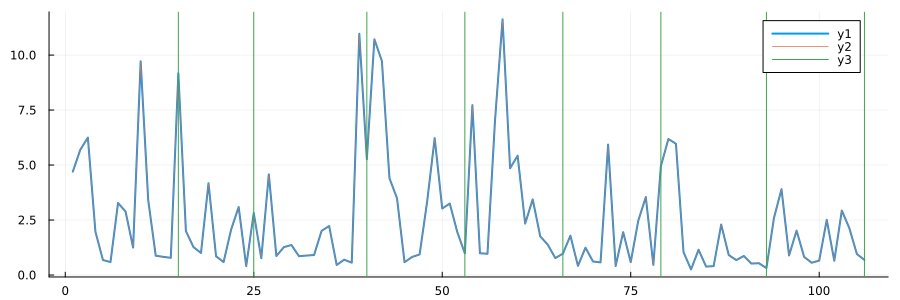

In [33]:
# Plot the IC of the combined model. 
plot(pitch_table.IC[1:106], lw=2)

# Plot the IC of each separate model
plot!(pitch_table.IC[1:106], lw=0.7)

# Extract phrase boundary information from sequences and plot them.
phrases = [e.PHRASE for e in vcat(sequences...)];
vline!(findall(x->x==-1,phrases[1:106]), lw = 1)

plot!(size=(900,300))

# Write CSV

In [34]:
#using CSV
#CSV.write("nova.csv", nova_table)

"nova.csv"

In [42]:
#CSV.write("pitch_stm.csv",pitch_table)

"pitch_stm.csv"